

# Project: TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains informationabout 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.                                                                                                                       
● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.                         
● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is                 
● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,       accounting for inflation over time



### Question(s) for Analysis
1- Is the budget of the movie affecting its average rating?                                                                     
2- Does the budget affect the revenue?                                                                                         
3- Is there a high growth of budgets to make movies per years?                                                                 
4- Is the duration of the movie affecting its revenue?                                                                                         
5- Do most of the movies take high or low average rating?

In [21]:
#importing the needed packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling



### General Properties

Let's explore the dataset to know its properties

In [22]:
#reading our database
df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [23]:
#Showing some statistics from the database
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [24]:
#showing some features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [25]:
#Checking null values in the dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [26]:
#checking the number of duplicated rows in the dataset
df.duplicated().sum()

1


### Data Cleaning
It's the time to clean our dataset 

In [27]:
#dropping the duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

We have 1 duplicate in our data set so we dropped it.



In [28]:
#changing wrong datatype
df['release_date']= pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

In [29]:
#dropping useless columns
df= df.drop(['imdb_id', 'homepage','tagline', 'keywords', 'overview', 'budget_adj','revenue_adj'],axis =1)
df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


We found that there are some columns that wouldn't help us in our analysis so we droped them.

In [30]:
#checking the null values after dropping columns
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [31]:
#Dropping the null values
df= df.fillna('unknown')
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

After droping the unnecessary columns, we found some columns that have NULL values, so we filled them with 'unknown' because there are strings.

<a id='eda'></a>
## Exploratory Data Analysis

Let's answer our questions


### Research Question 1 (Is the budget of the movie affecting its average rating?)

In [32]:
def plot(title,x,y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

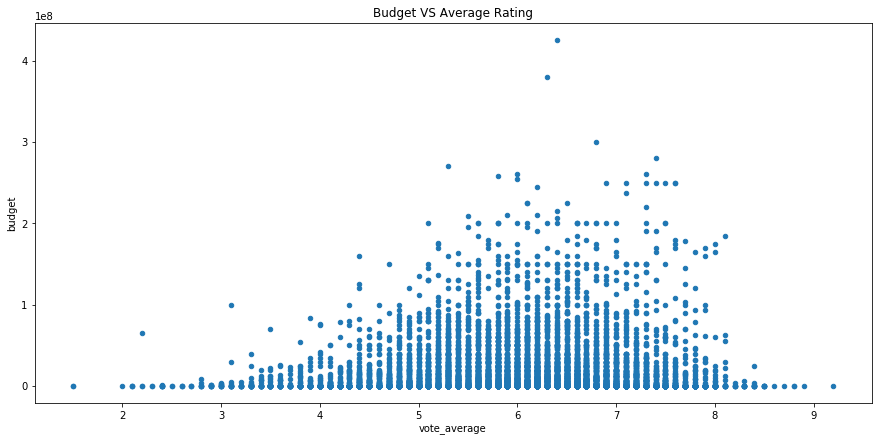

In [33]:
#creating scatter plot to know the relationship between the budget and the average rating
df.plot(x='vote_average', y= 'budget', kind = 'scatter',figsize=(15,7))
plt.title('Budget VS Average Rating');

From the plot we can see that: When the budget increases, the vote average also increases but the highest vote average movies have low budget.

In [34]:
#creating some values to assist us in the next plot
budget_med= df['budget'].mean()
low_budget= df.query('budget <{}'.format(budget_med))
high_budget= df.query('budget >={}'.format(budget_med))
low_mean=low_budget['vote_average'].mean()
high_mean=high_budget['vote_average'].mean()

[5.937680250783699, 6.0780276816608998]


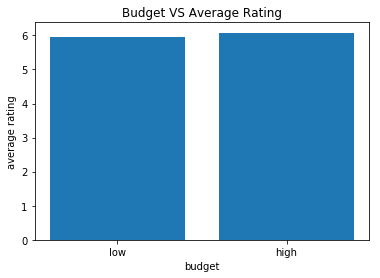

In [35]:
#creating bar plot to show the relationship between the budget and the average rating
heights= [low_mean,high_mean]
print(heights)
labels= ['low','high']
locations= [1,2]
plt.bar(locations, heights, tick_label=labels)
plot('Budget VS Average Rating','budget','average rating')

The results between average high and low movies budget are close, so it's very difficult to say that the budget of the movie has high effect on its rating.

### Research Question 2  (Does the budget affect the revenue?)

colleration between budget and revenue= 0.734927981289


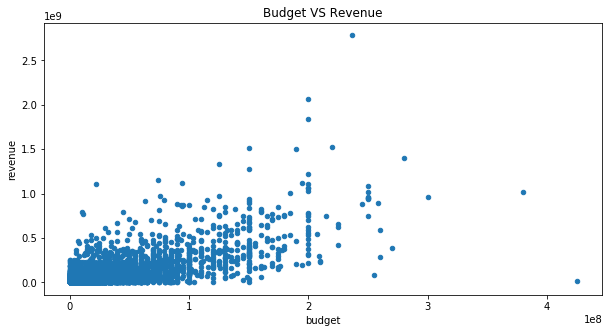

In [36]:
#creating scatter plot to help us know the effectiveness of the budget on the revenue
df.plot(x='budget',y='revenue',kind='scatter',figsize=(10,5))
plot('Budget VS Revenue','budget','revenue')
print('colleration between budget and revenue=',df.corr().loc['revenue','budget'])

The previous plot shows that the correlation between the budget and the revenue is 0.7, so it is a high possibility to get high revenue when you pay more. 

### Research Question 3  (Is there a high growth of budgets to make movies per years?)

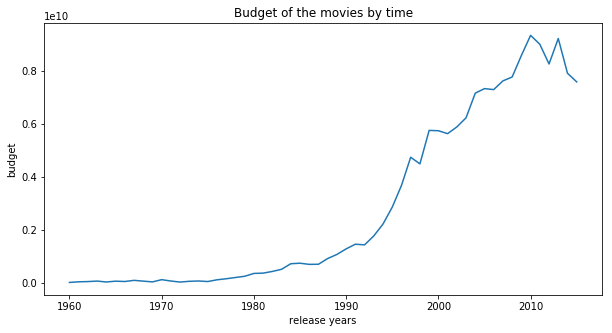

In [37]:
#creating plot te represent the growth of the budgets over the years
df.groupby('release_year', as_index = True)['budget'].sum().plot(figsize=(10,5))
plot('Budget of the movies by time','release years','budget')

This plot shows that the budgets of the movies are increasing by the time, so there is a very high growth on movies budgets per years.

### Research Question 4  (Is the duration of the movie affecting its  revenue?)

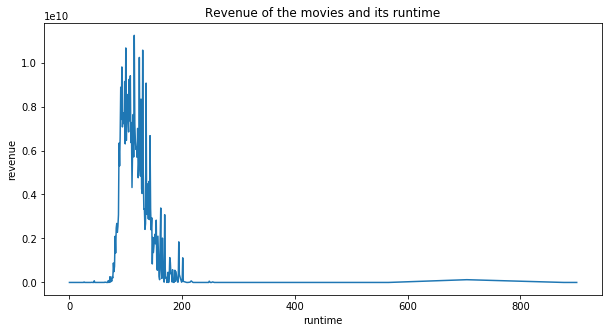

In [38]:
#creating plot to show the effect of the duration of the movie on its revenue
df2=df.groupby('runtime')['revenue'].sum()
df2.plot(figsize=(10,5))
plot('Revenue of the movies and its runtime','runtime','revenue')

The plot reveals that nor the short or the long movies get high revenue, The average movies that its time between (2:2.15) get the highest revenue.

### Research Question 5 (Do most of the movies take high or low average rating?)

6.0

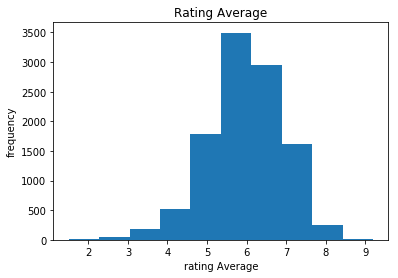

In [39]:
#creating histogram to help us knowing the average rating that most of the movies take
df['vote_average'].plot(kind='hist')
plot('Rating Average','rating Average','frequency')
df['vote_average'].median()

The histogram shows that most of the movies have an average rating of 6.

<a id='conclusions'></a>
## Conclusions

- From Question(1): It's not required to pay alot to impress the fans because there are alot of movies with high budgets gets low average rating.
- From Question(2): The colleration between the revenue you get and the budget you pay is about 0.7, so you have high possibility to get high revenue when you pay more.
- From Question(3): The budget that the creators pays on the movies increasing over the time.
- From Question(4): The highest revenues come from average time movies which are between nearly (2 : 2.15) hours.   
- From Question(5): The average rating of the most of the movies don't take very high or very low average rating, They take almost 6 as average rating.


# Limitations
     
We have some problems in this dataset that obstruct our analysis:                                                           
1- We don't know how true this dataset is because we have columns such as budget and revenue columns that don't have
   currency unit.                                                                                                               
2- There are some columns which have string values have more than one value that separated by "|", so it stoped as
   a barrier in my analysis.                                                                                                   
3- Alot of values in budget and revenue columns are set to 0, so this is considered as missing data which makes our analysis      not accurate.                                                                                                       


## Submitting your Project 

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0